#  <서울시 내 저렴한 주유소를 이용하려면?>  
## 작성자 : 박민지 

### **분석 내용** 
 - <strong><a href="http://www.opinet.co.kr/searRgSelect.do">Opinet사이트</a></strong>를 통해 <strong>3/17일</strong> 기준인 휘발유가격, 경유 가격, 위치 등의 데이터를 알 수 있습니다.  
 - Selenium 패키지를 통해 웹에 있는 **서울시 주유소 정보**를 **정형화**하여 데이터를 정리 및 시각화 하였습니다.
 - '구', '브랜드', '셀프여부' 기준을 가지고 어느 지역에 주유소가 몰려있는지 분석하여 결론을 도출했습니다. 

### **결론 요약**
 - 강남구에 있는 주유가격이 비쌀 것이라고 가정하였지만 실제로 **'용산구', '종로구', '중구'에 가장 비싼 주유소**가 많이 몰려있습니다. 
 - **서초구**에는 그 지역의 **40% 이상 비싼 주유소**가 15%있는 지역입니다. 따라서, 서초구 주유소를 들릴 때에는 평균 가격을 고려하여 주유소를 선택해야합니다. 
 - SK에너지 브랜드는 브랜드 중 가장 비쌉니다. **현대오일뱅크, 알뜰 주유소**를 이용하기를 추천합니다.
 - 셀프 주유가 저렴할 것이라고 예측할 수 있지만 실제 --%만큼 저렴한 것으로 나와 셀프가 가격에 미치는 영향보다는 지역에 영향을 미치는 것이 더 크다는 것을 알 수 있습니다. 


In [28]:
from selenium import webdriver
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

> webdriver를 통해 opinet사이트의 지역 중 구별에 해당하는 태그와 xpath를 요소검사를 통해 찾았습니다.

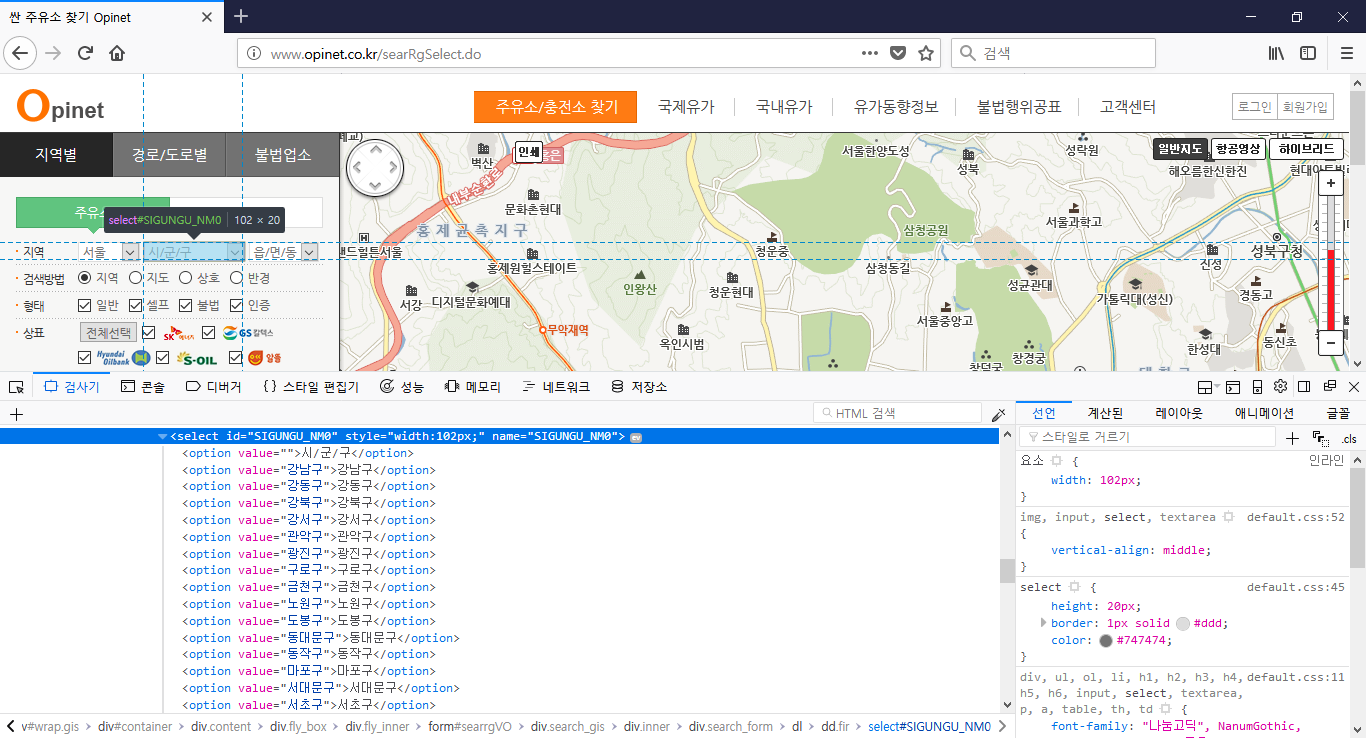

In [47]:
from IPython.display import Image
Image(filename='../주유소_시군구.png')

> 시군구를 알 수 있는 해당 xpath를 통해 데이터가 들어가있는 option태그를 통해 시군구 이름을 불러왔습니다. 
<br> for구문으로 구 이름을 출력시켰습니다.

In [70]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""") #
gu_list = gu_list_raw.find_elements_by_tag_name("option") #tag_name

In [74]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
print(gu_names, len(gu_names)) # 리스트형식으로 출력 됨.

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'] 25


> 시험삼아 **gu_names 리스트**의 첫번째인 **강남구**를 입력하여 크롬으로 보여지게 했습니다.

In [76]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0]) 

> 파이어폭스 요소검사를 통해 서울시 내 **구를 조회할 수 있는 버튼 태그**를 찾았습니다.

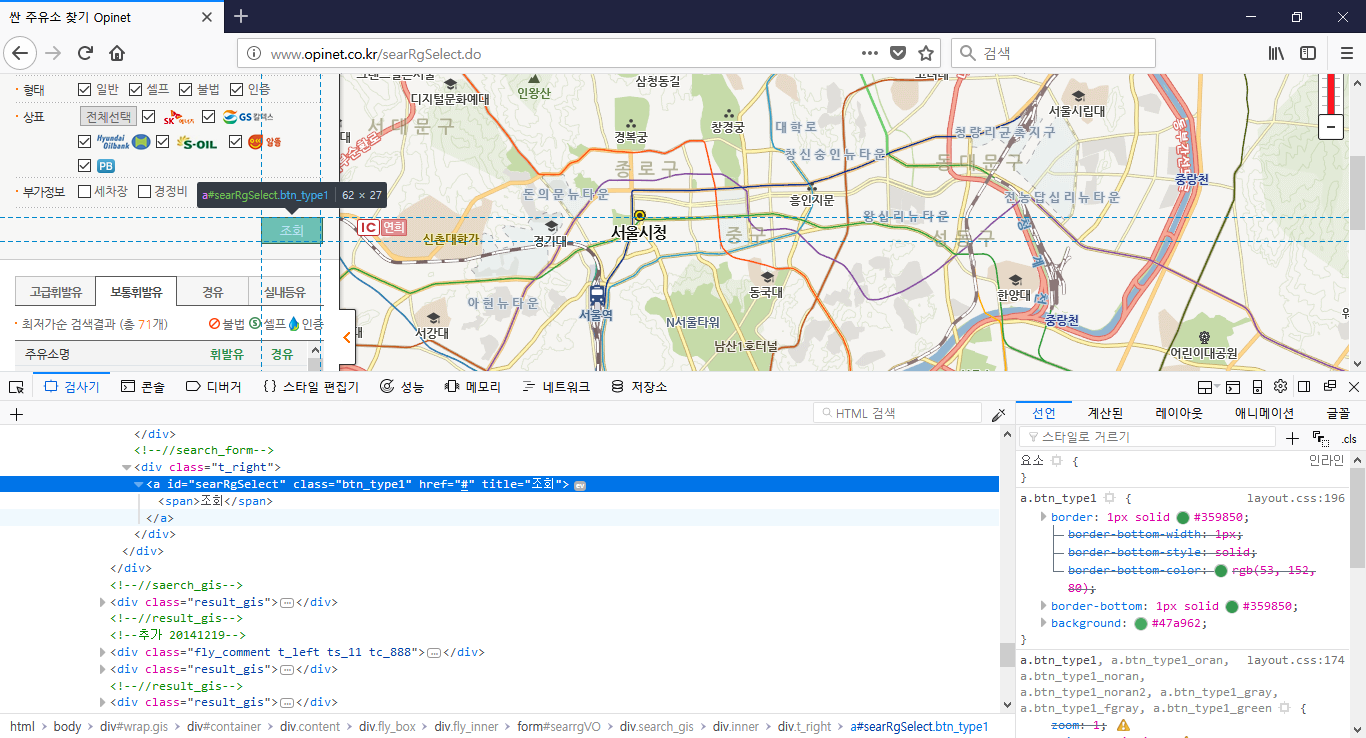

In [64]:
Image('../주유소_찾기버튼.png')

In [33]:
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

> Opinet 페이지는 조회를 눌릴 경우 그 구의 주유소 데이터를 운이 좋게도 csv파일로 다운받을 수 있는 기능이 있습니다.
<br> csv파일을 받을 수 있는 태그를 요소검사를 통해 찾았습니다.

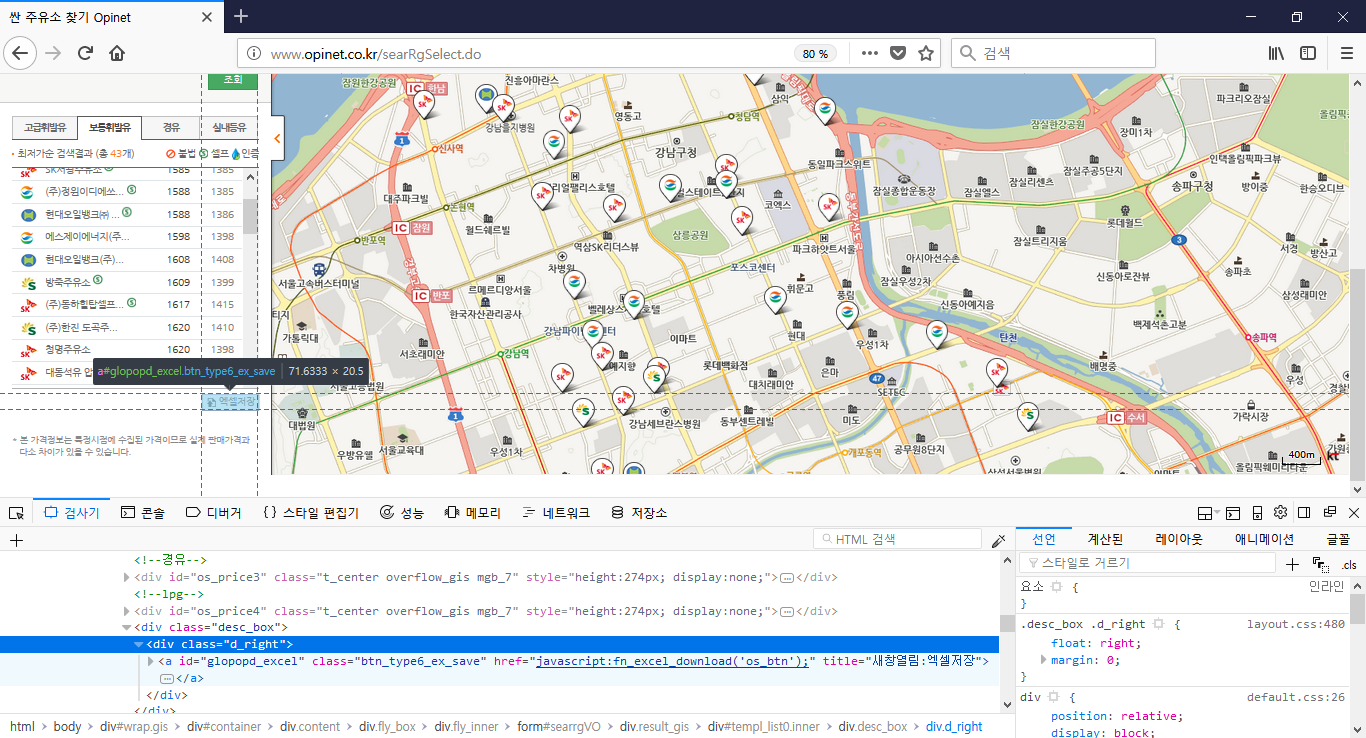

In [65]:
Image('../주유소_엑셀.png')

In [34]:
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

> <p> 서울시 내의 총 25개의 주유소 정보가 담긴 csv를 저장하기 위해 **for 구문**으로 받습니다.</p> <br>
 총 **3가지 단계**가 담겨있습니다. 
<br> 1) opinet홈페이지의 구를 조회합니다. <br> 2) 조회 버튼을 누릅니다. 
<br> 3) 관련 구의 주유소 정보를 알 수 있는 엑셀파일을 받습니다. <br>
<br> time.sleep없이 실행하기 되면 경로가 혼선이 생겨 중간에 멈출 수 있어 time.sleep을 지정했습니다. 


In [40]:
import time

for gu in gu_names:
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

> 38개의 엑셀파일을 oil_data 파일 저장한 뒤 불러냈습니다. <br>
**지역, 상호, 주소, 상표, 전화번호, 셀프여부, 고급휘발유, 휘발유, 경유, 실내등유**의 10개의 컬럼값을 데이터프레임으로 불러왔습니다.

In [79]:
import pandas as pd
from glob import glob

glob('../oil_data/*.xls')

['../oil_data\\지역_위치별(주유소) (1).xls',
 '../oil_data\\지역_위치별(주유소) (10).xls',
 '../oil_data\\지역_위치별(주유소) (11).xls',
 '../oil_data\\지역_위치별(주유소) (12).xls',
 '../oil_data\\지역_위치별(주유소) (13).xls',
 '../oil_data\\지역_위치별(주유소) (14).xls',
 '../oil_data\\지역_위치별(주유소) (15).xls',
 '../oil_data\\지역_위치별(주유소) (16).xls',
 '../oil_data\\지역_위치별(주유소) (17).xls',
 '../oil_data\\지역_위치별(주유소) (18).xls',
 '../oil_data\\지역_위치별(주유소) (19).xls',
 '../oil_data\\지역_위치별(주유소) (2).xls',
 '../oil_data\\지역_위치별(주유소) (20).xls',
 '../oil_data\\지역_위치별(주유소) (21).xls',
 '../oil_data\\지역_위치별(주유소) (22).xls',
 '../oil_data\\지역_위치별(주유소) (23).xls',
 '../oil_data\\지역_위치별(주유소) (24).xls',
 '../oil_data\\지역_위치별(주유소) (25).xls',
 '../oil_data\\지역_위치별(주유소) (3).xls',
 '../oil_data\\지역_위치별(주유소) (4).xls',
 '../oil_data\\지역_위치별(주유소) (5).xls',
 '../oil_data\\지역_위치별(주유소) (6).xls',
 '../oil_data\\지역_위치별(주유소) (7).xls',
 '../oil_data\\지역_위치별(주유소) (8).xls',
 '../oil_data\\지역_위치별(주유소) (9).xls',
 '../oil_data\\지역_위치별(주유소).xls']

In [99]:
oil_data = glob('../oil_data/*.xls')

raw_data = []

for i in oil_data:
    raw_data.append(pd.read_excel(i, header=2)) 
    
raw_data

[       지역                   상호                          주소      상표  \
 0   서울특별시     주)지유에너지직영 오렌지주유소    서울특별시 강동구  성안로 102 (성내동)   SK에너지   
 1   서울특별시       GS칼텍스㈜직영 신월주유소      서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 2   서울특별시               구천면주유소       서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 3   서울특별시                광성주유소       서울 강동구 올림픽로 673 (천호동)   S-OIL   
 4   서울특별시      (주)퍼스트오일 코알라주유소   서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 5   서울특별시              방아다리주유소        서울 강동구 동남로 811 (명일동)   SK에너지   
 6   서울특별시         알이디씨(주)천동주유소   서울특별시 강동구  천호대로 987 (천호동)  현대오일뱅크   
 7   서울특별시  (주)소모에너지엔테크놀러지성내주유소       서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 8   서울특별시             sk해뜨는주유소    서울특별시 강동구  상일로 132 (강일동)   SK에너지   
 9   서울특별시       대성석유(주)직영길동주유소      서울 강동구 천호대로 1168 (둔촌동)   GS칼텍스   
 10  서울특별시              고속셀프주유소  서울특별시 강동구  천호대로 1246 (둔촌동)   SK에너지   
 11  서울특별시   SK네트웍스㈜암사주유소(self)       서울 강동구 올림픽로 749 (암사동)   SK에너지   
 12  서울특별시       SK네트윅스(주)길동주유소       서울 강동구 천호대로 1221 (길동)   SK에너지   
 13  서

In [261]:
oil_data = pd.concat(raw_data)
oil_data.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1555,1357,1047
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1865,1555,1355,1020
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1365,-
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1588,1388,1100
4,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1588,1388,-


In [262]:
oil_data.describe()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
count,571,571,571,571,571,571,571,571,571,571
unique,1,518,527,8,528,2,135,221,228,99
top,서울특별시,선우상사,서울 강남구 양재대로 339 (개포동),SK에너지,02-512-5521,N,-,1598,1398,-
freq,571,3,2,231,2,399,342,22,23,303


> **총 571개**의 주유소 중에 **고급휘발유가 없는 주유소는 342개, 실내등유가 없는 주유소는 303개입니다.** 
<br>값이 없는 경우이기 때문에 '-'를 **None 값**으로 처리하였습니다.
<br>실내등유는 데이터 분석 때 사용하지 않을 컬럼이기 때문에 삭제했습니다.

In [263]:
print(len(oil_data[oil_data['고급휘발유']=='-']))
print(len(oil_data[oil_data['실내등유']=='-']))

342
303


In [264]:
oil_data = oil_data.drop(['고급휘발유'],axis=1)
oil_data = oil_data.drop(['실내등유'],axis=1)
oil_data.head()

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
0,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,1555,1357
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1555,1355
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,1556,1365
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,1588,1388
4,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,1588,1388


> 주소 컬럼에 빈 칸을 기준으로 분리시켜 두 번째 단어인 구이름을 새로운 칼럼 구로 생성했습니다.
<br> 

In [265]:
oil_data['구'] = [eachAddress.split()[1] for eachAddress in oil_data['주소']]
oil_data.head()

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유,구
0,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,1555,1357,강동구
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1555,1355,강동구
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,1556,1365,강동구
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,1588,1388,강동구
4,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,1588,1388,강동구


In [266]:
oil_data['구'].unique()

array(['강동구', '도봉구', '특별시', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '서울특별시', '성북구', '송파구', '양천구', '강북구', '영등포구', '용산구', '은평구', '종로구',
       '중구', '중랑구', '강서구', '강남구', '관악구', '광진구', '구로구', '금천구', '노원구'],
      dtype=object)

In [267]:
oil_data[oil_data['구']=='특별시']

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유,구
9,서울특별시,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),S-OIL,02-954-5400,Y,1514,1314,특별시


In [268]:
oil_data.loc[oil_data['구']=='특별시', '구'] = '도봉구'

In [269]:
oil_data[oil_data['구']=='서울특별시']

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유,구
11,서울특별시,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),SK에너지,02-464-7252,N,1669,1484,서울특별시


In [270]:
oil_data.loc[oil_data['구']=='서울특별시', '구'] = '성동구'

In [271]:
oil_data['구'].unique()

array(['강동구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강북구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '강남구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [272]:
oil_data = oil_data[oil_data['휘발유']!='-']
oil_data = oil_data[oil_data['경유'] !='-']

In [276]:
oil_data['경유'] = [float(var) for var in oil_data['경유']]
oil_data['휘발유'] = [float(var) for var in oil_data['휘발유']]

In [278]:
oil_data.reset_index(inplace=True)
del oil_data['index']

oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
지역      566 non-null object
상호      566 non-null object
주소      566 non-null object
상표      566 non-null object
전화번호    566 non-null object
셀프여부    566 non-null object
휘발유     566 non-null float64
경유      566 non-null float64
구       566 non-null object
dtypes: float64(2), object(7)
memory usage: 24.4+ KB


In [279]:
oil_data.to_csv('../oil_data.csv', sep=',', encoding='UTF-8')

In [282]:
import pandas as pd
oildata = pd.read_csv('../oil_data.csv')

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [310]:
oildata.sort_values(by='휘발유', ascending=False).head(10)

,Unnamed: 0,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유,구
565,565,서울특별시,뉴서울(강남),서울 강남구 언주로 716 (논현동),SK에너지,02-518-5631,N,2160.0,1970.0,강남구
435,435,서울특별시,뉴서울(강남),서울 강남구 언주로 716 (논현동),SK에너지,02-518-5631,N,2160.0,1970.0,강남구
339,339,서울특별시,장충주유소,서울 중구 장충단로 202 (장충동1가),SK에너지,02-2279-9965,N,2147.0,1968.0,중구
140,140,서울특별시,양재주유소,서울 서초구 바우뫼로 178 (양재동),SK에너지,02-577-1621,N,2145.0,1956.0,서초구
338,338,서울특별시,서남주유소,서울 중구 통일로 30 (봉래동1가),SK에너지,02-752-2262,N,2143.0,1959.0,중구
298,298,서울특별시,강변주유소,서울특별시 용산구 원효로 9 (청암동),SK에너지,02-712-7124,N,2136.0,1974.0,용산구
299,299,서울특별시,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),SK에너지,02-754-5217,N,2136.0,1958.0,용산구
297,297,서울특별시,흥국주유소,서울 용산구 한남대로 204 (한남동),SK에너지,02-795-0802,N,2133.0,1958.0,용산구
564,564,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,2127.0,1929.0,강남구
433,433,서울특별시,오천주유소,서울 강남구 봉은사로 503 (삼성동),SK에너지,02-545-2822,N,2127.0,1929.0,강남구


In [316]:
oildata.sort_values(by='휘발유', ascending=True).head(10)

,Unnamed: 0,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유,구
300,300,서울특별시,타이거주유소,서울 은평구 수색로 188 (증산동),SK에너지,02-309-9145,N,1494.0,1294.0,은평구
301,301,서울특별시,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),현대오일뱅크,02-374-8770,Y,1497.0,1297.0,은평구
251,251,서울특별시,성락주유소,서울 영등포구 가마산로 414 (신길동),S-OIL,02-842-6148,Y,1498.0,1298.0,영등포구
252,252,서울특별시,(주)블루에너지,서울특별시 영등포구 가마산로 367 (대림동),SK에너지,02-843-5151,Y,1498.0,1298.0,영등포구
253,253,서울특별시,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),GS칼텍스,02-841-8780,N,1498.0,1298.0,영등포구
358,358,서울특별시,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),SK에너지,032-671-5186,Y,1505.0,1280.0,강서구
159,159,서울특별시,원천주유소,서울특별시 성북구 돌곶이로 142 (장위동),알뜰주유소,02-943-1051,N,1505.0,1288.0,성북구
160,160,서울특별시,강산주유소,서울 성북구 보문로 27 (보문동7가),GS칼텍스,02-953-1448,N,1507.0,1303.0,성북구
239,239,서울특별시,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,1507.0,1297.0,강북구
59,59,서울특별시,서경주유소,서울 동작구 대림로 46 (신대방동),현대오일뱅크,02-843-5130,N,1508.0,1308.0,동작구


In [315]:
import numpy as np
gudata = pd.pivot_table(oildata, index=['구'], values=['휘발유'], aggfunc=np.mean)
gudata

,휘발유
구,
강남구,1804.325581
강동구,1633.777778
강북구,1528.583333
강서구,1582.371429
관악구,1599.411765
광진구,1569.611111
구로구,1601.818182
금천구,1590.214286
노원구,1613.000000


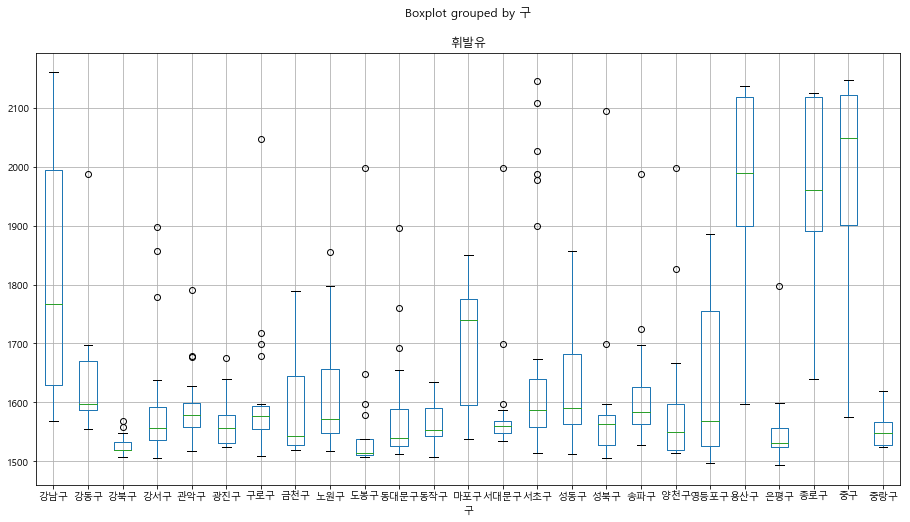

In [289]:
oildata.boxplot(column='휘발유', by='구', figsize=(15,8))

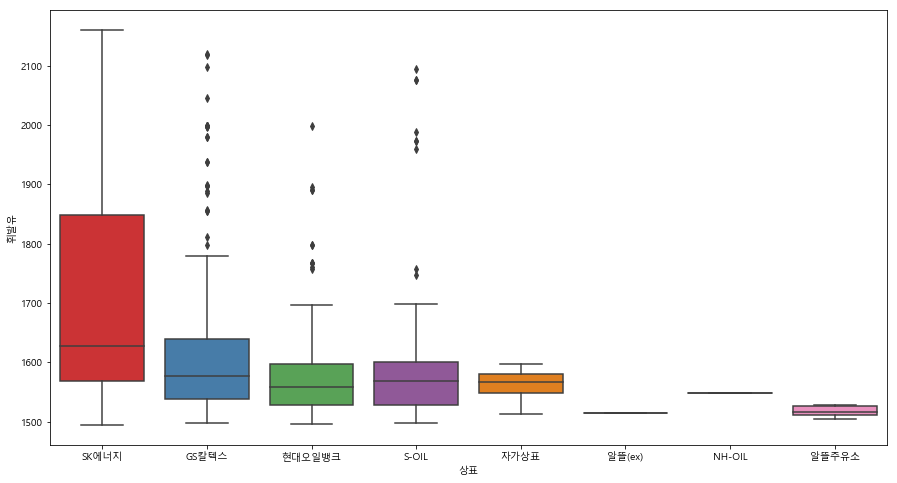

In [297]:
plt.figure(figsize=(15,8))
sns.boxplot(x='상표', y='휘발유', data=oildata, palette="Set1")
plt.show()

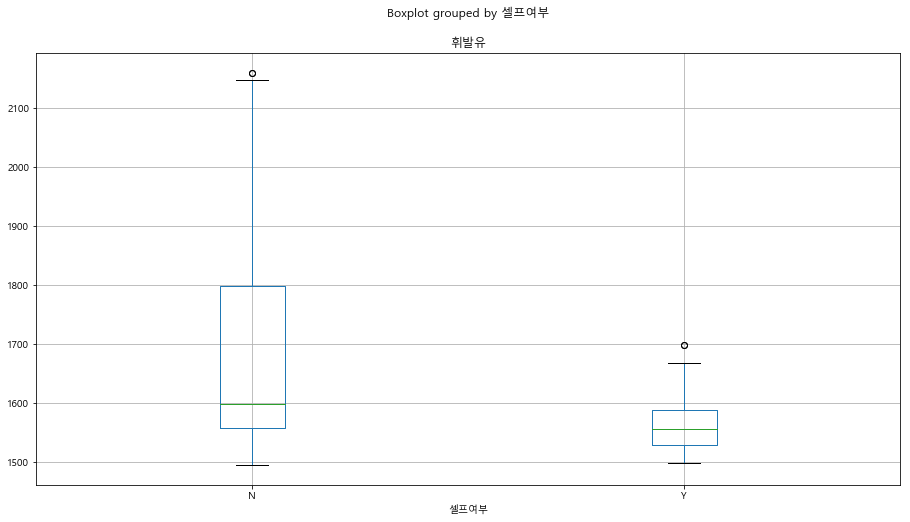

In [304]:
oildata.boxplot(column='휘발유', by='셀프여부', figsize=(15,8))